# Integrating spheres

**Scott Prahl**

**June 2021**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import iadpython.sphere
%config InlineBackend.figure_format='retina'


## Integrating spheres are used to collect all light

The interior surfaces are a matte white paint (in the past this was something very white like MgSO₄ or BaSO₄).  Any light entering the sphere will bounce around multiple times.  Each bounce diffuses the incident light and it does this until the light fall on the inside walls of the sphere is uniform everywhere.  A detector port can then be placed anywhere on the sphere to get a measure that scales with the total amount of light entering the sphere.

## Port areas

If we look at a cross-section of an integrating sphere used in to measure transmission (left) and reflection (right) then we can see the diameters of the sphere and each of the ports.

<center>
    <img src="sphere.png" width="50%" />
</center>

The natural thing would be to use subscripts and define the relative area of the sample as $a_\mathrm{sample}$. Relative area parameters are 

$$
a_\mathrm{sample} = \frac{\mbox{Area of sample port}}{\mbox{Surface area of integrating sphere}}
$$

Other relative areas are the area of the detector  $a_\mathrm{detector}$, the area of the entrance port $a_\mathrm{entrance}$, and the area of the sphere wall $a_\mathrm{wall}$

The total sphere surface includes the sphere has wall and ports (sample, detector, and entrance).  Thus

$$
A_\mathrm{total} = A_\mathrm{wall} + A_\mathrm{sample} +  A_\mathrm{detector} +  A_\mathrm{entrance}
$$

or in terms of dimensionless relative areas 

$$
a_\mathrm{wall} = 1 -  a_\mathrm{sample} - a_\mathrm{detector} - a_\mathrm{entrance}
$$

One thing to note is that for the sphere on the left (the transmission experiment) the entrance port does not exist and therefore has zero area.  The fraction of the sphere walls that is covered by ports is greater in the experiment on the left than the one on the right.  Thus the relative wall area $a_\mathrm{wall}$ for the two experiments will be different.

### Spherical caps

The ports consist of holes in the sphere created by a plane passing through the edge of the sphere.  This means that the area of the disk $\pi a^2$ differs slightly from the area of the subtended surface area of sphere that was removed.  This section is for those who worry about such things.

<center>
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/2f/Spherical_cap_diagram.tiff/lossless-page1-597px-Spherical_cap_diagram.tiff.png" width="15%"/>
</center>

Note that a port with radius $a$ has a cap area on a sphere with radius $r$

$$
A_\mathrm{cap} = 2\pi r h
$$
where $h$ is the height of the cap
$$
h = r - \sqrt{r^2-a^2}
$$

The relative area is then

$$
a_\mathrm{cap} = \frac{2\pi r h}{4\pi r^2} = \frac{r - \sqrt{r^2-a^2}}{2r} \approx \frac{a^2}{4r^2} - \frac{a^4}{16r^4} + \cdots
$$

This can be compared directly with the normalized area of a disk divided by the surface area of the sphere:

$$
a_\mathrm{cap}' = \frac{\pi a^2}{4\pi r^2} = \frac{a^2}{4r^2}  = \frac{d_\mathrm{cap}^2}{4d_\mathrm{sphere}^2}
$$

This is a tiny change from the naive approach; since $a_\mathrm{cap}<0.01$ typically, the cap area error will be less than 1%.


## Super simple sphere model: No reflection from ports

The simplest thing is to assume that the ports completely absorb any light that falls on them.  Consider the case of a beam of light (P₀) that hits the wall and becomes perfectly diffuse, 

$$
\mbox{first bounce} = P_0 r_0
$$

This light then falls on all the sphere walls.  The total light reflected by the walls after this first bounce will be 

$$
\mbox{second bounce} = (P_0 r_0) \times (r_\mathrm{wall} a_\mathrm{wall})
$$

this light will then be reflected again and the light hitting all walls for the second bounce will be

$$
\mbox{third bounce} = (P_0 r_0) \times (r_\mathrm{wall} a_\mathrm{wall}) \times (r_\mathrm{wall} a_\mathrm{wall})
$$

The total power on the walls will be

$$
P_\mathrm{wall} = \mbox{(power from first bounce)}  + \mbox{(power from second bounce)} + \cdots
$$

or

$$
P_\mathrm{wall} = P_0 r_0(1 + (r_\mathrm{wall}a_\mathrm{wall}) + (r_\mathrm{wall}a_\mathrm{wall})^2 + \cdots) = \frac{r_\mathrm{wall}}{1-r_\mathrm{wall}a_\mathrm{wall}} P_0
$$

This suggests introducing a sphere multiplier $M$ defined as

$$
M = \frac{P_\mathrm{wall}}{P_0} = \frac{r_0}{1-r_\mathrm{wall}a_\mathrm{wall}}
$$

and if the light hits the sphere wall first $r_0=r_\mathrm{wall}$ so

$$
M =  \frac{r_\mathrm{wall}}{1-r_\mathrm{wall}a_\mathrm{wall}}
$$


### Sphere wall radiance multiplier for different port areas

There 10-50X more light on any part of the sphere wall than you would get if you just took the light entering the sphere and divided by the surface area of the walls.  Here we see the how the two light loss mechanisms (port size and wall reflectance) affect this multipler.

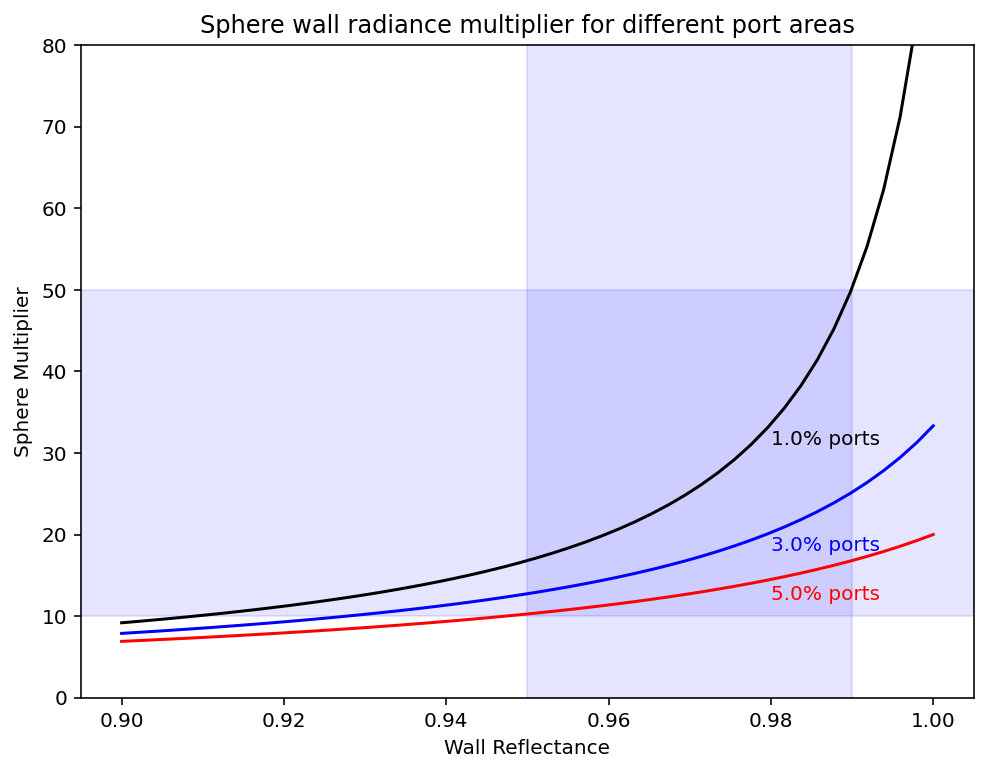

In [2]:
sphere_diameter = 250
r_wall = np.linspace(0.9,1,50)
s = iadpython.sphere.Sphere(sphere_diameter, 1)

plt.figure(figsize=(8,6))

s.a_wall = 0.99
plt.plot(r_wall, s.multiplier(UR1=1, URU=0, r_wall=r_wall), color='black')
plt.text(0.98, 31, '%.1f%% ports'%(100-100*s.a_wall),color='black')

s.a_wall = 0.97
plt.plot(r_wall, s.multiplier(UR1=1, URU=0, r_wall=r_wall), color='blue')
plt.text(0.98, 18, '%.1f%% ports'%(100-100*s.a_wall),color='blue')

s.a_wall = 0.95
plt.plot(r_wall, s.multiplier(UR1=1, URU=0, r_wall=r_wall), color='red')
plt.text(0.98, 12, '%.1f%% ports'%(100-100*s.a_wall),color='red')

plt.xlabel('Wall Reflectance')
plt.ylabel('Sphere Multiplier')
plt.ylim(0,80)

plt.axvspan(0.95,0.99,color='blue',alpha=0.1)
plt.axhspan(10,50,color='blue',alpha=0.1)

plt.title("Sphere wall radiance multiplier for different port areas")

plt.show()

### Cumulative effect of multiple sphere bounces on wall radiance

Each bounce contributes a little more.  Highly reflective spheres with small port areas will bounce around hundreds of times before reaching a steady state radiance on the wall.

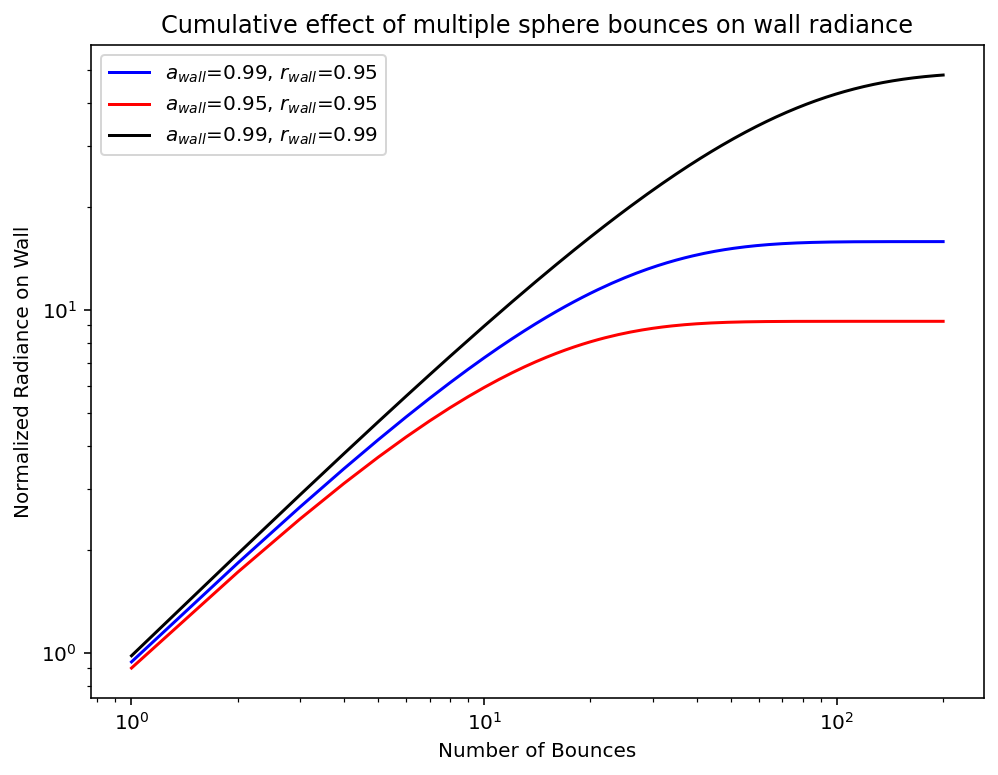

In [4]:
bounces = np.linspace(1,200,200)
plt.figure(figsize=(8,6))

a_wall = 0.99
r_wall = 0.95
r_cum = np.cumsum((r_wall*a_wall)**bounces)
label = '$a_{wall}$=%.2f, $r_{wall}$=%.2f'%(a_wall,r_wall)
plt.loglog(bounces, r_cum, 'b', label=label)

a_wall = 0.95
r_wall = 0.95
r_cum = np.cumsum((r_wall*a_wall)**bounces)
label = '$a_{wall}$=%.2f, $r_{wall}$=%.2f'%(a_wall,r_wall)
plt.loglog(bounces, r_cum, 'r', label=label)

a_wall = 0.99
r_wall = 0.99
r_cum = np.cumsum((r_wall*a_wall)**bounces)
label = '$a_{wall}$=%.2f, $r_{wall}$=%.2f'%(a_wall,r_wall)
plt.loglog(bounces, r_cum, 'k', label=label)

plt.legend()
plt.xlabel('Number of Bounces')
plt.ylabel('Normalized Radiance on Wall')
plt.title('Cumulative effect of multiple sphere bounces on wall radiance')
plt.show()

### Wall radiance relative to perfectly white 250mm sphere

This is another graph showing the non-linear relationship between the wall radiance and the reflectivity of the sphere walls.

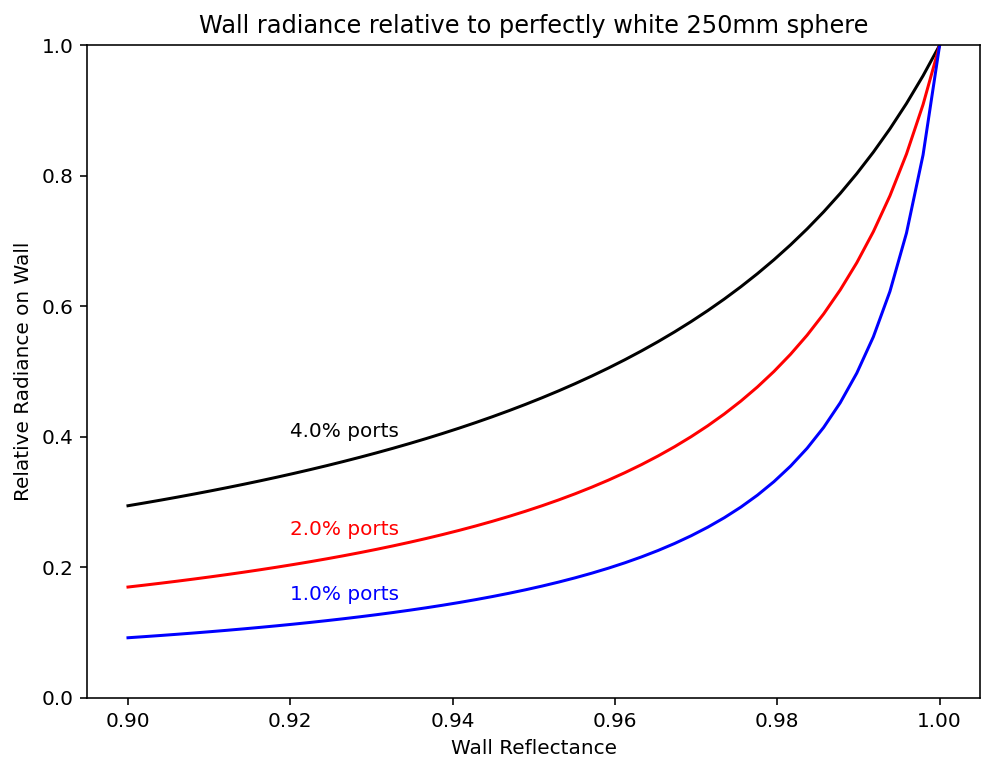

In [4]:
r_wall = np.linspace(0.9,1,50)
s = iadpython.sphere.Sphere(250, 1)
plt.figure(figsize=(8,6))

s.a_wall = 0.96
M = s.multiplier(UR1=1, URU=0, r_wall=r_wall)
plt.plot(r_wall, M/np.max(M),color='black')
plt.text(0.92, 0.4, '%.1f%% ports'%(100-100*s.a_wall),color='black')

s.a_wall = 0.98
M = s.multiplier(UR1=1, URU=0, r_wall=r_wall)
plt.plot(r_wall, M/np.max(M),color='red')
plt.text(0.92, 0.25, '%.1f%% ports'%(100-100*s.a_wall),color='red')

s.a_wall = 0.99
M = s.multiplier(UR1=1, URU=0, r_wall=r_wall)
plt.plot(r_wall, M/np.max(M),color='blue')
plt.text(0.92, 0.15, '%.1f%% ports'%(100-100*s.a_wall),color='blue')

plt.xlabel('Wall Reflectance')
plt.ylabel('Relative Radiance on Wall')
plt.ylim(0,1)
plt.title('Wall radiance relative to perfectly white 250mm sphere')

plt.show()

## Simple sphere model with sample and detector ports

The reflectance of each the ports is not usually 0%. Of course, the entrance port is remains empty and still has no reflectance.  However, there is nearly always a sample and a detector.  If we include these when calculating the total light then we get slightly different equations.  

We start with a power $P_0$ entering the sphere.  

$$
\mbox{first bounce} = r_0 P_0
$$

The value of r₀ varies with the experiment. If the light is collimated, it might hit the sphere wall or a sample or  it might pass through the a sample and emerge diffuse.  It is also possible that the light enters the sphere fully diffuse.  Some possible cases are

| r₀   |   Description    |
| ---  | :---  |
| 1     | fully diffuse light enters the sphere |
| r$_w$ | light hits the walls of the sphere first|
| UR1   | collimated light hits sample and is diffusely reflected into sphere |
| UT1   | diffuse light hits sample and is reflected diffusely into sphere |
| UR1   | collimated light hits sample and is diffusely reflected into sphere |
| UTU   | diffuse light hits sample and is transmitted diffusely into sphere |

This light $r_0 P_0$ is assumed to be completely diffuse and reach all ports and walls in the sphere.  The  light reflected for the second bounce will be

$$
\mbox{second bounce} = r_0 P_0 \cdot (r_\mathrm{wall} a_\mathrm{wall} + r_\mathrm{detector} a_\mathrm{detector} + r_\mathrm{sample} a_\mathrm{sample})
$$

The second bounce is also totally diffues and the third bounce will be

$$
\mbox{third bounce} = r_0 P_0 \cdot (r_\mathrm{wall} a_\mathrm{wall} + r_\mathrm{detector} a_\mathrm{detector} + r_\mathrm{sample} a_\mathrm{sample})^2
$$

Adding everything together, we get the total power on the walls

$$
P_\mathrm{wall} = \frac{r_0 P_0}{1-(r_\mathrm{wall} a_\mathrm{wall} + r_\mathrm{detector} a_\mathrm{detector} + r_\mathrm{sample} a_\mathrm{sample})} 
$$

And so the sphere multiplier $M$ above is modified to become

$$
M = \frac{P_\mathrm{wall}}{P_0} = \frac{r_0}{1-(r_\mathrm{wall} a_\mathrm{wall} + r_\mathrm{detector} a_\mathrm{detector} + r_\mathrm{sample} a_\mathrm{sample})}
$$

This means that the sample reflectance has a non-linear relationship to the reflectance.  This gets worse when more internal bounces take place (i.e., as the port sizes get smaller for a constant wall reflectivity or as the reflectivity increases and the port sizes remain the same.)  These effects are shown in the two graphs below.

### Effect of sample reflectance on relative radiance in sphere with 98% reflectivity

If the radiance on the walls of the sphere is linearly related to the reflectance (or transmittance) of a sample then we can just determine the sample reflectance with a few measurements $M$

$$
R_\mathrm{sample} = \frac{M_s-M_0}{M_{100}-M_0}
$$

However, as we can see below, as the sample size (i.e., port) gets larger and larger, this simple relationship breaks down.

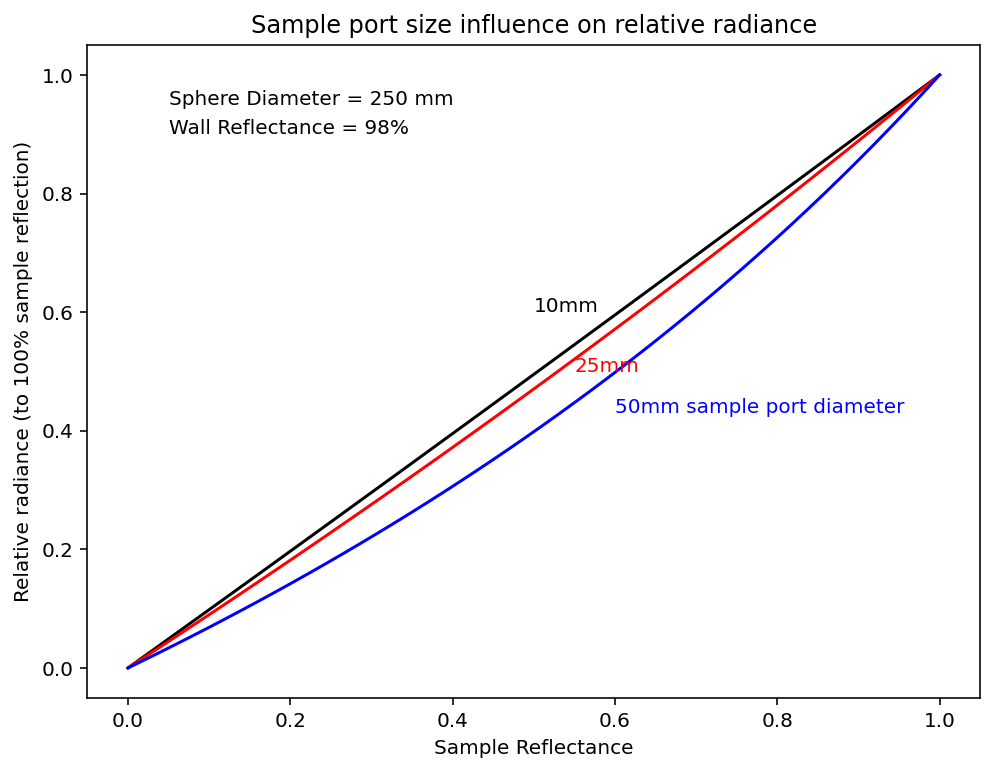

In [11]:

r_sample = np.linspace(0.0,1,50)
s = iadpython.sphere.Sphere(250, 25.4, r_wall=0.98)

plt.figure(figsize=(8,6))

s.d_sample = 10
M = s.multiplier(UR1=r_sample, URU=r_sample)
plt.plot(r_sample, M/np.max(M), color='black')
plt.text(0.5,0.60,'%gmm'%(s.d_sample), color='black')

s.d_sample=25
M = s.multiplier(UR1=r_sample, URU=r_sample)
plt.plot(r_sample, M/np.max(M), color='red')
plt.text(0.55,0.5,'%gmm'%(s.d_sample), color='red')

s.d_sample=50
M = s.multiplier(UR1=r_sample, URU=r_sample)
label='$d_{sample}$=%.2f, %.0fmm sphere'%(s.a_wall,s.d_sphere)
plt.plot(r_sample, M/np.max(M), color='blue')
plt.text(0.6,0.43,'%gmm sample port diameter'%(s.d_sample), color='blue')

plt.xlabel('Sample Reflectance')
plt.ylabel('Relative radiance (to 100% sample reflection)')
plt.title('Sample port size influence on relative radiance')
plt.text(0.05,0.95,"Sphere Diameter = %g mm"%s.d_sphere)
plt.text(0.05,0.90,"Wall Reflectance = %g%%"%(100*s.r_wall))

plt.show()

### Effect of wall reflectivity on relative radiance with 25mm sample port

Here we see the slightly perplexing result that higher wall reflectivities increase non-linear response.  This is follows from the fact that in whiter spheres, the light bounces around more times.  The light has more chances to interact with the sample and therefore the sample ends up having a larger non-linear effect.

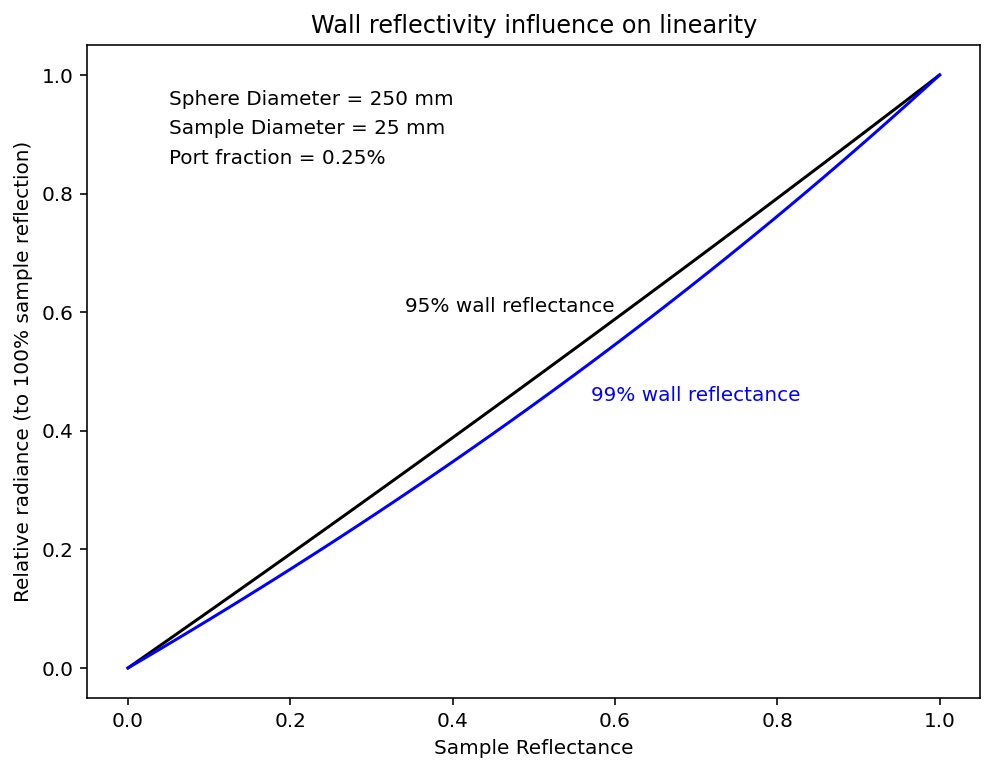

In [16]:
r_sample = np.linspace(0.0,1,50)
s = iadpython.sphere.Sphere(250, 25)

plt.figure(figsize=(8,6))

r_wall=0.95
M = s.multiplier(UR1=r_sample, URU=r_sample, r_wall=r_wall)
plt.plot(r_sample, M/np.max(M), color='black')
plt.text(0.6,0.60,'%g%% wall reflectance'%(100*r_wall), color='black', ha='right')

r_wall=0.99
M = s.multiplier(UR1=r_sample, URU=r_sample, r_wall=r_wall)
plt.plot(r_sample, M/np.max(M), color='blue')
plt.text(0.57,0.45,'%g%% wall reflectance'%(100*r_wall), color='blue', ha='left')

plt.xlabel('Sample Reflectance')
plt.ylabel('Relative radiance (to 100% sample reflection)')
plt.title('Wall reflectivity influence on linearity')
plt.text(0.05,0.95,"Sphere Diameter = %g mm"%s.d_sphere)
plt.text(0.05,0.90,"Sample Diameter = %g mm"%(s.d_sample))
plt.text(0.05,0.85,"Port fraction = %.2g%%"%(100-100*s.a_wall))

plt.show()

1. what is gain
2. what is f
3. multiport analysis for UR1
4. multiport analysis for UT1
5. calculation of b1 and b2
6. calculation of sphere wall reflectivity
7. How much of an effect do these equations have??


## Sphere model that tracks reflected sepa

Assume that a sphere is illuminated with diffuse light having a power *P*. Typically, the source of this diffuse light is light reflected by (or transmitted through) the sample.

We assume that this diffuse light can reach all parts of sphere — specifically, that light from this source is not blocked by a baffle.  Multiple reflections within the sphere will increase the power falling on non-white areas in the sphere (e.g., the sample, detector, and entrance). 

The total power entering the sphere is divided between the fractions hitting the wall, the sample port, the detector port, and the entrance port

$$
P = P_\mathrm{wall} + P_\mathrm{sample} + P_\mathrm{detector} + P_\mathrm{entrance}
$$

#### First incidence in reflection experiment

Consider a reflection experiment.  In this case the light reflected by the sample P will only fall on the walls and the entrance port.  It cannot hit the detector (because of a baffle) and it cannot hit the sample (because that is where it is leaving).

$$
P_\mathrm{wall}^{(1)} = \frac{A_\mathrm{wall}}{A-A_\mathrm{detector}-A_\mathrm{sample}} P, \qquad P_\mathrm{sample}^{(1)} = 0, \qquad 
P_\mathrm{detector}^{(1)} = 0, \qquad 
P_\mathrm{entrance}^{(1)} = \frac{A_\mathrm{entrance}}{A-A_\mathrm{detector}-A_\mathrm{sample}} P
$$

or (after dividing numerator and denominators in the fractions by $A$

$$
P_\mathrm{wall}^{(1)} = \frac{a_\mathrm{wall}}{a_\mathrm{wall}+a_\mathrm{entrance}} P, \qquad 
P_\mathrm{sample}^{(1)} = 0, \qquad 
P_\mathrm{detector}^{(1)} = 0, \qquad 
P_\mathrm{entrance}^{(1)} = \frac{a_\mathrm{entrance}}{a_\mathrm{wall}+a_\mathrm{entrance}} P
$$

We see that $P=P_\mathrm{wall}^{(1)}+P_\mathrm{entrance}^{(1)}$.  The light reflected

$$
B_\mathrm{wall}^{(1)} = r_\mathrm{wall} P_\mathrm{wall}^{(1)}, \qquad 
B_\mathrm{sample}^{(1)} = 0, \qquad 
B_\mathrm{detector}^{(1)} = 0, \qquad 
B_\mathrm{entrance}^{(1)} = 0
$$


#### First incidence in transmission experiment

Consider a transmission experiment.  In this case the power transmitted by the sample P will only fall on the walls.  It cannot hit the detector (because of a baffle), it cannot hit the entrance port (because there is none), and it cannot hit the sample (because that is where it is leaving).  Thus all the light hits the walls

$$
P_\mathrm{wall}^{(1)} = P, \qquad P_\mathrm{sample}^{(1)} = 0, \qquad 
P_\mathrm{detector}^{(1)} = 0, \qquad 
P_\mathrm{entrance}^{(1)} = 0
$$

The light that bounces off the sphere parts is then

$$
B_\mathrm{wall}^{(1)} = r_\mathrm{wall} P, \qquad 
B_\mathrm{sample}^{(1)} = 0, \qquad 
B_\mathrm{detector}^{(1)} = 0, \qquad 
B_\mathrm{entrance}^{(1)} = 0
$$

#### Second incidence in reflection experiment

The distribution of power for the second incidence for each part can only arise from the first incidence on the walls

$$
P_\mathrm{wall}^{(2)} = a_\mathrm{wall} B_\mathrm{wall}^{(1)}, \qquad 
P_\mathrm{sample}^{(2)} = a_\mathrm{sample} B_\mathrm{wall}^{(1)}, \qquad 
P_\mathrm{detector}^{(2)} = a_\mathrm{detector} B_\mathrm{wall}^{(1)}, \qquad 
P_\mathrm{entrance}^{(2)} = a_\mathrm{entrance} B_\mathrm{wall}^{(1)}
$$

The second bounce from each part is then

$$
B_\mathrm{wall}^{(2)} = r_\mathrm{wall}P_\mathrm{wall}^{(2)}, \qquad
B_\mathrm{sample}^{(2)} = \mathrm{URU} \cdot P_\mathrm{sample}^{(2)}, \qquad
B_\mathrm{detector}^{(2)} = r_\mathrm{detector} P_\mathrm{detector}^{(2)}, \qquad
B_\mathrm{entrance}^{(2)} = 0
$$

#### Third incidence in reflection experiment

The distribution of power for the third incidence for each part now arises from the first incidence on the walls

$$
P_\mathrm{wall}^{(2)} = a_\mathrm{wall} (B_\mathrm{wall}^{(2)} + B_\mathrm{sample}^{(2)} + B_\mathrm{detector}^{(2)})\qquad 
P_\mathrm{sample}^{(2)} = a_\mathrm{sample} B_\mathrm{wall}^{(2)}\qquad 
P_\mathrm{detector}^{(2)} = a_\mathrm{detector} B_\mathrm{wall}^{(2)}, \qquad 
P_\mathrm{entrance}^{(2)} = a_\mathrm{entrance} (B_\mathrm{wall}^{(2)} + B_\mathrm{sample}^{(2)} + B_\mathrm{detector}^{(2)})
$$

The second bounce from each part is then

$$
B_\mathrm{wall}^{(2)} = r_\mathrm{wall}P_\mathrm{wall}^{(2)}, \qquad
B_\mathrm{sample}^{(2)} = \mathrm{URU} \cdot P_\mathrm{sample}^{(2)}, \qquad
B_\mathrm{detector}^{(2)} = r_\mathrm{detector} P_\mathrm{detector}^{(2)}, \qquad
B_\mathrm{entrance}^{(2)} = 0
$$




The light that hits the wall after $k$ bounces has the same form as above 

$$
P_\mathrm{wall}^{(k)} = a_\mathrm{wall} r_\mathrm{wall} P_\mathrm{wall}^{(k-1)} + (1-a_\mathrm{entrance}) r_\mathrm{detector}  P_\mathrm{detector}^{(k-1)} + (1-a_\mathrm{entrance}) r_\mathrm{sample} P_\mathrm{sample}^{(k-1)}
$$

Since the light falling on the sample and detector must come from the wall

$$
P_\mathrm{sample}^{(k)} = a_\mathrm{sample} r_\mathrm{wall} P_\mathrm{wall}^{(k-1)} \qquad\hbox{and}\qquad  P_\mathrm{detector}^{(k)} = a_\mathrm{detector}
r_\mathrm{wall} P_\mathrm{wall}^{(k-1)},
$$

Therefore,

$$
P_\mathrm{wall}^{(k)} = a_\mathrm{wall} r_\mathrm{wall} P_\mathrm{wall}^{(k-1)} + (1-a_\mathrm{entrance}) r_\mathrm{wall} (a_\mathrm{detector} r_\mathrm{detector} + a_\mathrm{sample} r_\mathrm{sample})
P_\mathrm{wall}^{(k-2)}
$$

The total power falling on the wall is just

$$
P_\mathrm{wall} = \sum_{k=1}^\infty P_\mathrm{wall}^{(k)} = 
\frac{a_\mathrm{wall} + (1-a_\mathrm{entrance}) ( a_\mathrm{detector} r_\mathrm{detector} +a_\mathrm{sample} r_\mathrm{sample})}
     {1- a_\mathrm{wall} r_\mathrm{wall} - (1-a_\mathrm{entrance})r_\mathrm{wall}(a_\mathrm{detector} r_\mathrm{detector} + a_\mathrm{sample} r_\mathrm{sample})} P
$$

The total power falling the detector is

$$
P_\mathrm{detector} = a_\mathrm{detector} P + \sum_{k=2}^\infty a_\mathrm{detector} r_\mathrm{wall} P_\mathrm{wall}^{(k-1)} = a_\mathrm{detector} P + a_\mathrm{detector} r_\mathrm{wall}
P_\mathrm{wall}
$$

The gain $G(r_\mathrm{diffuse})$ on the irradiance on the detector (relative to a black sphere),

$$
G(r_\mathrm{sample}) \equiv \frac{P_\mathrm{detector} /A_\mathrm{detector}}{P/A} 
$$

in terms of the sphere parameters

$$
G(r_\mathrm{sample})  = 1+ {1\over a_\mathrm{wall}} \cdot {a_\mathrm{wall} r_\mathrm{wall} + (1-a_\mathrm{entrance}) r_\mathrm{wall} (a_\mathrm{detector} r_\mathrm{detector}
+a_\mathrm{sample} r_\mathrm{sample})  \over 1- a_\mathrm{wall} r_\mathrm{wall} - (1-a_\mathrm{entrance})r_\mathrm{wall}(a_\mathrm{detector} r_\mathrm{detector} + a_\mathrm{sample} r_\mathrm{sample})}
$$

The gain for a detector in a transmission sphere is similar, but with
primed parameters to designate a second potential sphere that is used.
For a black sphere the gain $G(0) = 1$, which is easily verified by
setting $r_\mathrm{wall}=0$, $r_\mathrm{diffuse}=0$, and $r_\mathrm{detector}=0$.  Conversely, when the
sphere wall and sample are perfectly white, the irradiance at the
entrance port, the sample port, and the detector port must increase so
that the total power leaving via these ports is equal to the incident
diffuse power $P$.  

Thus the gain should be the ratio of the sphere wall area over the area
of the ports through which light leaves or $G(1)=A/(A_\mathrm{entrance}+A_\mathrm{detector})$ which
follows immediately from the gain formula with $r_\mathrm{wall}=1$, $r_\mathrm{diffuse}=1$,
and $r_\mathrm{detector}=0$.

The gain $G(r_\mathrm{sample})$ on the irradiance on the detector (relative to a black sphere),
$$
G(r_\mathrm{sample}) \equiv {P_\mathrm{detector} /A_\mathrm{detector}\over P/A} 
$$
in terms of the sphere parameters
$$
G(r_\mathrm{sample})  = 1+ {a_\mathrm{wall} r_\mathrm{wall} + (1-a_\mathrm{entrance}) r_\mathrm{wall} (a_\mathrm{detector} r_\mathrm{detector} +a_\mathrm{sample} r_\mathrm{sample}) 
\over 1- a_\mathrm{wall} r_\mathrm{wall} - (1-a_\mathrm{entrance})r_\mathrm{wall}(a_\mathrm{detector} r_\mathrm{detector} + a_\mathrm{sample} r_\mathrm{sample})}
$$